In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import operator
import itertools
import math
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
%matplotlib inline

In [ ]:
# YEARS = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
# FILE_PATHS = ['./datasets/merged_1996_PP.csv', './datasets/merged_1997_PP.csv', './datasets/merged_1998_PP.csv',
#          './datasets/merged_1999_PP.csv', './datasets/merged_2000_PP.csv', './datasets/merged_2001_PP.csv',
#          './datasets/merged_2002_PP.csv', './datasets/merged_2003_PP.csv', './datasets/merged_2004_PP.csv', 
#          './datasets/merged_2005_PP.csv', './datasets/merged_2006_PP.csv', './datasets/merged_2007_PP.csv', 
#              './datasets/merged_2008_PP.csv', './datasets/merged_2009_PP.csv', './datasets/merged_2010_PP.csv', 
#              './datasets/merged_2011_PP.csv', './datasets/merged_2012_PP.csv', './datasets/merged_2013_PP.csv']

# combined_df = []

# for index, path in enumerate(FILE_PATHS):
#     df = pd.read_csv(path, encoding='latin-1', low_memory=False)
#     df['year'] = list(itertools.repeat(YEARS[index],len(df)))
#     combined_df.append(df)

# combined_df = pd.concat(combined_df)

In [205]:
YEARS = [2009, 2010, 2011, 2012, 2013]
FILE_PATHS = ['./datasets/merged_2009_PP.csv', './datasets/merged_2010_PP.csv', 
             './datasets/merged_2011_PP.csv', './datasets/merged_2012_PP.csv']

combined_df = []

for index, path in enumerate(FILE_PATHS):
    df = pd.read_csv(path, encoding='latin-1', low_memory=False)
    df['year'] = list(itertools.repeat(YEARS[index],len(df)))
    combined_df.append(df)

combined_df = pd.concat(combined_df)

In [203]:
combined_df = combined_df[combined_df.PREDDEG == 3]

In [201]:
# 'ACTCMMID', 'ADM_RATE_ALL', 'TUITIONFEE_PROG', 'AVGFACSAL', 'md_earn_wne_p10','mn_earn_wne_p6', 'median_hh_inc'
COLUMNS = ['ACTCMMID', 'ADM_RATE_ALL','AVGFACSAL','GRAD_DEBT_MDN']
newDF = combined_df[COLUMNS]
newDF = newDF[newDF['GRAD_DEBT_MDN'] != 'PrivacySuppressed']
newDF['GRAD_DEBT_MDN'] = newDF['GRAD_DEBT_MDN'].astype(float)
newDF = newDF.dropna(subset = COLUMNS)
newDF.shape


(4925, 4)

In [124]:
predict = newDF['GRAD_DEBT_MDN']
X = newDF[COLUMNS].drop('GRAD_DEBT_MDN', axis = 1)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,predict,test_size=0.33)

In [126]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Xtrain, Ytrain)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(Xtest) - Ytest) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Xtest, Ytest))

Coefficients: 
 [ -2.13364700e+02   5.53114541e+02  -2.08703814e-01]
Residual sum of squares: 18286950.35
Variance score: 0.07


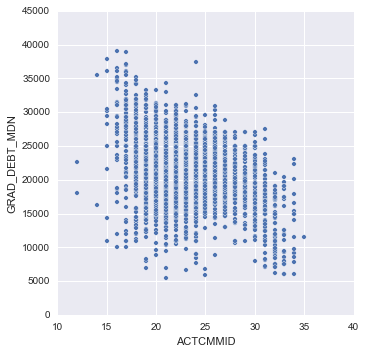

In [204]:
# data=df, hue = 'PREDDEG', x_vars='GRAD_DEBT_MDN',y_vars='mn_earn_wne_p6',size=5

sns.pairplot(data = newDF, x_vars = 'ACTCMMID', y_vars = 'GRAD_DEBT_MDN', size = 5)

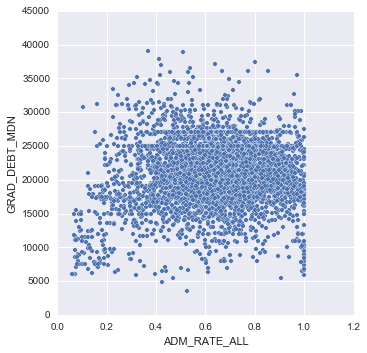

In [137]:
sns.pairplot(data = newDF, x_vars = 'ADM_RATE_ALL', y_vars = 'GRAD_DEBT_MDN', size = 5)

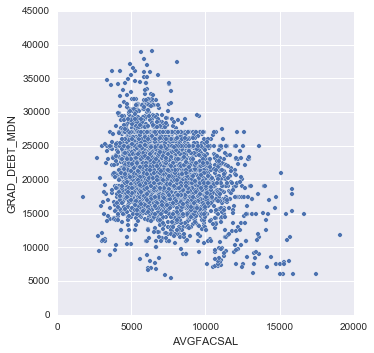

In [202]:
sns.pairplot(data = newDF, x_vars = 'AVGFACSAL', y_vars = 'GRAD_DEBT_MDN', size = 5)

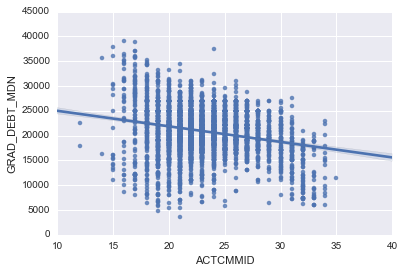

In [140]:
sns.regplot(x= 'ACTCMMID', y = 'GRAD_DEBT_MDN', data = newDF)

In [172]:
# 'ACTCMMID', 'ADM_RATE_ALL', 'TUITIONFEE_PROG', 'AVGFACSAL', 'md_earn_wne_p10','mn_earn_wne_p6', 'median_hh_inc'
COLUMNS = ['PAR_ED_PCT_MS', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS', 'GRAD_DEBT_MDN']
newDF = combined_df[COLUMNS]
newDF = newDF[newDF['GRAD_DEBT_MDN'] != 'PrivacySuppressed']
newDF['GRAD_DEBT_MDN'] = newDF['GRAD_DEBT_MDN'].astype(float)
newDF = newDF.dropna(subset = COLUMNS)
newDF.shape

(7615, 4)

c:\Users\Michael\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


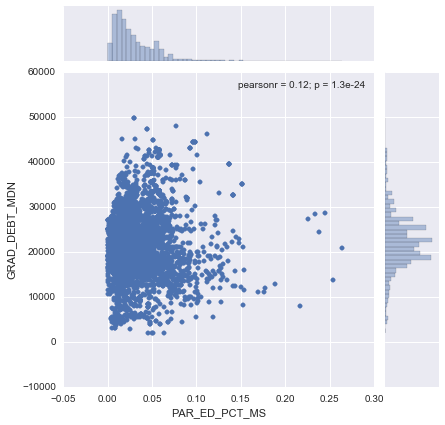

In [169]:
msDF = newDF[newDF['PAR_ED_PCT_MS'] != 'PrivacySuppressed']
msDF['PAR_ED_PCT_MS'] = msDF['PAR_ED_PCT_MS'].astype(float)
sns.jointplot(x= 'PAR_ED_PCT_MS', y = 'GRAD_DEBT_MDN', data = msDF)

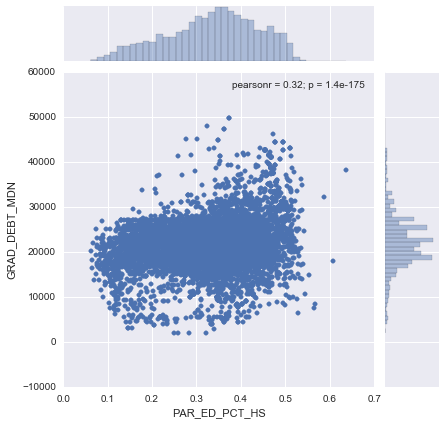

In [171]:
newDF = newDF[newDF['PAR_ED_PCT_HS'] != 'PrivacySuppressed']
newDF['PAR_ED_PCT_HS'] = newDF['PAR_ED_PCT_HS'].astype(float)
sns.jointplot(x= 'PAR_ED_PCT_HS', y = 'GRAD_DEBT_MDN', data = newDF)

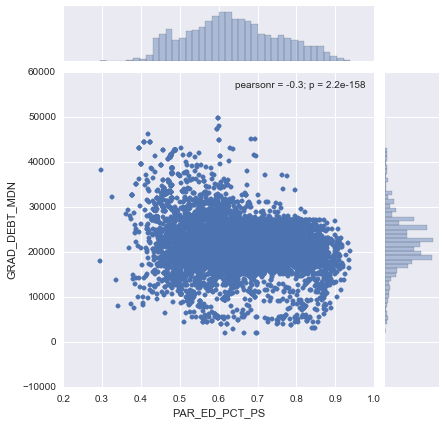

In [173]:
newDF = newDF[newDF['PAR_ED_PCT_PS'] != 'PrivacySuppressed']
newDF['PAR_ED_PCT_PS'] = newDF['PAR_ED_PCT_PS'].astype(float)
sns.jointplot(x= 'PAR_ED_PCT_PS', y = 'GRAD_DEBT_MDN', data = newDF)

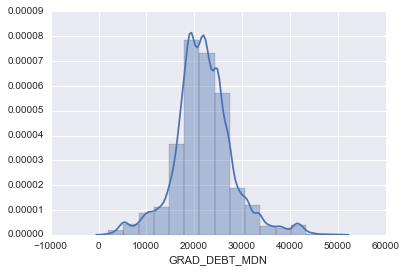

In [176]:
sns.distplot(newDF['GRAD_DEBT_MDN'],bins = 15)

In [2]:
df = pd.read_csv('./datasets/merged_2012_PP.csv', encoding='latin-1', low_memory=False)

In [3]:
newDF = df.select_dtypes(include=[np.number])
oDF = df.select_dtypes(include =['object'])

In [208]:
newDF.tail()

UNITID     OPEID  opeid6  AccredAgency  INSTURL  NPCURL  sch_deg  \
7788  47691101   4205801   42058           NaN      NaN     NaN      1.0   
7789  47701101  10145905    1459           NaN      NaN     NaN      3.0   
7790  47702001  10145903    1459           NaN      NaN     NaN      3.0   
7791  47702002  10145902    1459           NaN      NaN     NaN      3.0   
7792  47702003  10145906    1459           NaN      NaN     NaN      3.0   

      HCM2  main  NUMBRANCH         ...          gt_25k_p8  count_nwne_p9  \
7788   NaN     0          2         ...                NaN            NaN   
7789   NaN     0         93         ...                NaN            NaN   
7790   NaN     0         93         ...                NaN            NaN   
7791   NaN     0         93         ...                NaN            NaN   
7792   NaN     0         93         ...                NaN            NaN   

      count_wne_p9  mn_earn_wne_p9  sd_earn_wne_p9  gt_25k_p9  \
7788           NaN             NaN             NaN        NaN   
7789           NaN             NaN             NaN        NaN   
7790           NaN             NaN             NaN        NaN   
7791           NaN             NaN             NaN        NaN   
7792           NaN             NaN             NaN        NaN   

      C150_L4_POOLED_SUPP  C150_4_POOLED_SUPP  C200_L4_POOLED_SUPP  \
7788                  NaN                 NaN                  NaN   
7789                  NaN                 NaN                  NaN   
7790                  NaN                 NaN                  NaN   
7791                  NaN                 NaN                  NaN   
7792                  NaN                 NaN                  NaN   

      C200_4_POOLED_SUPP  
7788                 NaN  
7789                 NaN  
7790                 NaN  
7791                 NaN  
7792                 NaN  

[5 rows x 602 columns]

In [15]:
threshold = (1/10)
myCols = newDF.columns
myDF = newDF
counter = 0
for index, feature in enumerate(myCols):
    for i in range(0,len(newDF)):
        if math.isnan(newDF.ix[i,feature]):
            counter+=1
    if counter/len(newDF)>threshold:
        myDF = myDF.drop(feature,axis=1)
    counter = 0

In [220]:
newDF.shape

(7793, 602)

In [221]:
myDF.shape

(7793, 203)

In [222]:
dfClean = myDF.dropna(subset = myDF.columns)
dfClean.shape

(7237, 203)

In [218]:
for index,feat in enumerate(dfClean.columns):
    print(feat)

UNITID
OPEID
opeid6
sch_deg
main
NUMBRANCH
PREDDEG
HIGHDEG
CONTROL
st_fips
region
PCIP01
PCIP03
PCIP04
PCIP05
PCIP09
PCIP10
PCIP11
PCIP12
PCIP13
PCIP14
PCIP15
PCIP16
PCIP19
PCIP22
PCIP23
PCIP24
PCIP25
PCIP26
PCIP27
PCIP29
PCIP30
PCIP31
PCIP38
PCIP39
PCIP40
PCIP41
PCIP42
PCIP43
PCIP44
PCIP45
PCIP46
PCIP47
PCIP48
PCIP49
PCIP50
PCIP51
PCIP52
PCIP54
CIP01CERT1
CIP01CERT2
CIP01ASSOC
CIP01CERT4
CIP01BACHL
CIP03CERT1
CIP03CERT2
CIP03ASSOC
CIP03CERT4
CIP03BACHL
CIP04CERT1
CIP04CERT2
CIP04ASSOC
CIP04CERT4
CIP04BACHL
CIP05CERT1
CIP05CERT2
CIP05ASSOC
CIP05CERT4
CIP05BACHL
CIP09CERT1
CIP09CERT2
CIP09ASSOC
CIP09CERT4
CIP09BACHL
CIP10CERT1
CIP10CERT2
CIP10ASSOC
CIP10CERT4
CIP10BACHL
CIP11CERT1
CIP11CERT2
CIP11ASSOC
CIP11CERT4
CIP11BACHL
CIP12CERT1
CIP12CERT2
CIP12ASSOC
CIP12CERT4
CIP12BACHL
CIP13CERT1
CIP13CERT2
CIP13ASSOC
CIP13CERT4
CIP13BACHL
CIP14CERT1
CIP14CERT2
CIP14ASSOC
CIP14CERT4
CIP14BACHL
CIP15CERT1
CIP15CERT2
CIP15ASSOC
CIP15CERT4
CIP15BACHL
CIP16CERT1
CIP16CERT2
CIP16ASSOC
CIP16CERT4
CIP

In [ ]:
# try and fit a regression tree
Y = myDF['GRAD_DEBT_MDN']
X = myDF.drop('GRAD_DEBT_MDN', axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.33)
regr = DecisionTreeRegressor()
regr.fit(Xtrain,Ytrain)
prediction = regr.predict(Xtest)
print( mean((prediction-Ytest)**2))

In [115]:
from sklearn.decomposition import PCA
pca= PCA(n_components = 2)
pca.fit(dfClean)
print(pca.explained_variance_ratio_)

[  9.99205764e-01   7.70359042e-04]


In [4]:
oDF = df.select_dtypes(include =['object'])
myDF = oDF

counter = 0
for index, feature in enumerate(oDF.columns):
    for i in range(0,len(oDF)):
        if oDF.ix[i,feature] == 'PrivacySuppressed':
            counter+=1
    if counter/len(oDF)>(1/10):
        myDF = myDF.drop(feature,axis=1)
#         print(feature, counter/len(newDF))
    counter = 0

In [5]:
myDF = myDF.dropna()

In [6]:
# Remove Privacy Suppressed
for index, feature in enumerate(myDF):
    myDF = myDF[myDF[feature] != 'PrivacySuppressed']

In [7]:
# DROP columns that were not numerics
colsToDrop = ['INSTNM', 'CITY', 'STABBR', 'ZIP']
myDF= myDF.drop(colsToDrop, axis = 1)
myDF.tail()

RPY_3YR_RT      RPY_5YR_RT PAR_ED_PCT_HS PAR_ED_PCT_PS  \
7779  0.446143497758  0.584559359068   0.468482601    0.48074729   
7789  0.446143497758  0.584559359068   0.468482601    0.48074729   
7790  0.446143497758  0.584559359068   0.468482601    0.48074729   
7791  0.446143497758  0.584559359068   0.468482601    0.48074729   
7792  0.446143497758  0.584559359068   0.468482601    0.48074729   

     OVERALL_YR2_N OVERALL_YR3_N OVERALL_YR4_N OVERALL_YR6_N OVERALL_YR8_N  \
7779         18624         25399         14010          9378          7138   
7789         18624         25399         14010          9378          7138   
7790         18624         25399         14010          9378          7138   
7791         18624         25399         14010          9378          7138   
7792         18624         25399         14010          9378          7138   

     DEBT_MDN          ...           RPY_5YR_N FIRSTGEN_RPY_5YR_N  \
7779    13944          ...               13730               5587   
7789    13944          ...               13730               5587   
7790    13944          ...               13730               5587   
7791    13944          ...               13730               5587   
7792    13944          ...               13730               5587   

     NOTFIRSTGEN_RPY_5YR_N DEBT_MDN_SUPP GRAD_DEBT_MDN_SUPP  \
7779                  5393         13944              38515   
7789                  5393         13944              38515   
7790                  5393         13944              38515   
7791                  5393         13944              38515   
7792                  5393         13944              38515   

     GRAD_DEBT_MDN10YR_SUPP RPY_3YR_RT_SUPP LO_INC_RPY_3YR_RT_SUPP  \
7779           427.59545575  0.446143497758         0.367118310499   
7789           427.59545575  0.446143497758         0.367118310499   
7790           427.59545575  0.446143497758         0.367118310499   
7791           427.59545575  0.446143497758         0.367118310499   
7792           427.59545575  0.446143497758         0.367118310499   

     PELL_RPY_3YR_RT_SUPP FEMALE_RPY_3YR_RT_SUPP  
7779       0.376344804544          0.44161217136  
7789       0.376344804544          0.44161217136  
7790       0.376344804544          0.44161217136  
7791       0.376344804544          0.44161217136  
7792       0.376344804544          0.44161217136  

[5 rows x 36 columns]

In [8]:
# Convert data to floats
for index, feat in enumerate(myDF):
    myDF[feat] = myDF[feat].astype(float); # semicolon supresses output

In [10]:
import numpy as np
# try and fit a regression tree
Y = myDF['GRAD_DEBT_MDN']
X = myDF.drop('GRAD_DEBT_MDN', axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.33)
regr = DecisionTreeRegressor()
regr.fit(Xtrain,Ytrain)
prediction = regr.predict(Xtest)
print( np.mean((prediction-Ytest)**2))

35433.89042745334


In [12]:
regr.score(Xtest,Ytest)

0.99952603382613137

In [197]:
for index, val in enumerate(regr.feature_importances_):
    print(X.columns[index],': ', val)

RPY_3YR_RT :  2.22197954629e-07
RPY_5YR_RT :  1.37876872022e-07
PAR_ED_PCT_HS :  6.11892968411e-07
PAR_ED_PCT_PS :  5.13364844827e-05
OVERALL_YR2_N :  2.20197069017e-06
OVERALL_YR3_N :  5.94793764083e-08
OVERALL_YR4_N :  3.79869431993e-07
OVERALL_YR6_N :  1.87047191371e-06
OVERALL_YR8_N :  1.21497110705e-07
DEBT_MDN :  3.73490407049e-07
NOTFIRSTGEN_DEBT_MDN :  1.66732990742e-07
DEBT_N :  7.64300548535e-08
GRAD_DEBT_N :  4.43140934834e-08
WDRAW_DEBT_N :  3.29222414005e-08
FIRSTGEN_DEBT_N :  2.37500318351e-08
NOTFIRSTGEN_DEBT_N :  1.80860660936e-06
GRAD_DEBT_MDN10YR :  0.0778397537124
CUML_DEBT_N :  1.95810860986e-07
CUML_DEBT_P75 :  7.13938037648e-09
CUML_DEBT_P25 :  0.000879877648248
PAR_ED_N :  7.7029460541e-07
SEPAR_DT_N :  5.77043826346e-08
RPY_3YR_N :  1.03520443865e-07
FIRSTGEN_RPY_3YR_N :  1.05809429066e-07
NOTFIRSTGEN_RPY_3YR_N :  5.21376919322e-08
RPY_5YR_N :  1.27485544666e-06
FIRSTGEN_RPY_5YR_N :  1.36798668935e-07
NOTFIRSTGEN_RPY_5YR_N :  4.96580054038e-06
DEBT_MDN_SUPP :  3